In [1]:
cd /content/drive/MyDrive/Machine Learning Ineuron/Credit_card_self


/content/drive/MyDrive/Machine Learning Ineuron/Credit_card_self


In [2]:
data_path = '/content/drive/MyDrive/Machine Learning Ineuron/Credit_card_self/data/default of credit card clients.xls'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# loading dataset
df = pd.read_excel(data_path)

In [5]:
# display top 5 rows
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

We didn't find any null values in dataset, so we are good to go


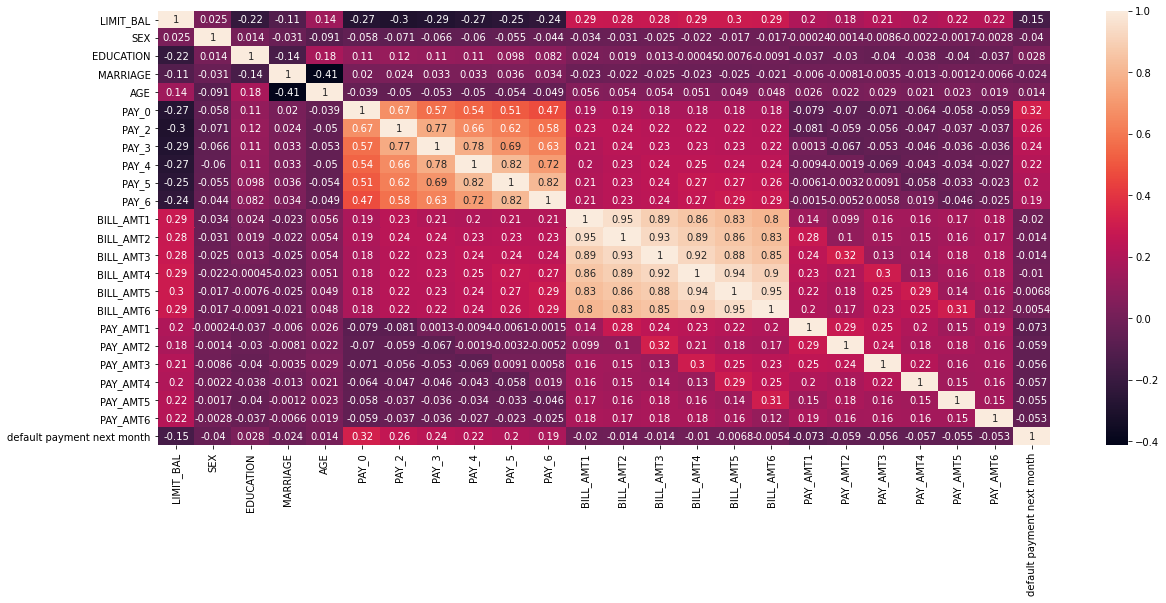

In [7]:
# draw heatmap to check colinearity in feture column
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True )

we can see some correlatioin in feature columns, but we can't remove these features because if a person defaults on forst month payment then there are high hance that he will default on next month too.

In [8]:
x=df.drop(labels=['default payment next month'],axis=1)
y=df['default payment next month']

In [9]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 55)

In [10]:
# standardise the dataset

from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [11]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [12]:
# create dataframe of scaled data

scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [13]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [14]:
scaled_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4892,-0.905161,0.811564,0.184675,-1.054139,1.261091,0.015419,0.109465,0.131948,0.181075,0.225533,0.248384,-0.032596,-0.018513,-0.543006,-0.535345,-0.502549,-0.550168,-0.228140,-0.215765,-0.178382,-0.246995,-0.298100,-0.268868
17406,1.405836,0.811564,1.457043,-1.054139,0.061792,0.015419,0.109465,0.131948,0.181075,0.225533,0.248384,-0.118874,-0.108399,-0.099148,-0.088109,-0.069114,-0.071882,-0.222104,-0.177774,-0.178382,-0.234008,-0.237570,-0.212327
3534,-0.519995,0.811564,1.457043,-1.054139,0.497901,0.015419,0.109465,0.131948,0.181075,0.225533,0.248384,-0.032120,-0.012665,-0.013749,0.026651,0.066638,0.062450,-0.217033,-0.178966,-0.193963,-0.199721,-0.209255,-0.220299
5225,-0.828128,0.811564,-1.087693,0.864804,-1.246533,0.015419,0.109465,0.131948,1.886645,0.225533,0.248384,0.087227,0.090729,0.170953,0.197528,0.276500,0.289724,-0.179850,-0.054227,-0.285102,-0.175565,-0.170314,-0.155786
5338,-1.136261,-1.232188,1.457043,0.864804,-1.137506,1.789644,1.771018,3.457373,3.592215,3.744243,3.722283,-0.675437,-0.669828,-0.660530,-0.647717,-0.637255,-0.625693,-0.342828,-0.266023,-0.285102,-0.311931,-0.318276,-0.297139


# by using Gaussian NaiveBias

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [16]:
# training gaussian naive bais model
model_gnb = gnb.fit(scaled_train_df, y_train)

In [17]:
# predicting on test data
y_pred = model_gnb.predict(scaled_test_df)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
ac=accuracy_score(y_test, y_pred)
ac

0.5972222222222222

In [52]:
file_name = 'gnb_base.pkl'
pickle.dump(model_gnb, open(file_name, "wb"))

we get only 59.7% accuracy, that is not good.
so now we'll use gridsearchcv to get good accuracy by tuning hyperpamenter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [22]:
# finding the best parameters

grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.638, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.702, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.541, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.655, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.557, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.716, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... var_smoothing=0.5, score=0.782, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.781, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.772, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.772, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.681, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .................. var_smoothing=0.05, score=0.740, total=   0.0s
[CV] var_smoothing=0.05 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [23]:
grid.best_score_

0.777952380952381

In [24]:
grid.best_params_

{'var_smoothing': 0.5}

here by tuning paramenter our accuracy got incresed, so let's use there param. to train our model

In [25]:
# training gaussian naive bais model
new_gnb = GaussianNB(var_smoothing=0.5)
model_new_gnb = new_gnb.fit(scaled_train_df, y_train)

In [26]:
y_pred = model_new_gnb.predict(scaled_test_df)

In [27]:
ac = accuracy_score(y_test, y_pred)
ac

0.7867777777777778

In [53]:
file_name = 'gnb_tuned.pkl'
pickle.dump(model_new_gnb, open(file_name, "wb"))

by tuning hypermeter we got a good increase in our accurcy score from 59% to 78%

# by using xgboost

In [28]:
from xgboost import XGBClassifier

In [29]:
xgb = XGBClassifier()

In [30]:
#training base xgboost model
model_xgb = xgb.fit(scaled_train_df, y_train)

In [31]:
y_pred = model_xgb.predict(scaled_test_df)

In [32]:
ac = accuracy_score(y_test, y_pred)
ac

0.8254444444444444

In [54]:
file_name = "xgb_base.pkl"
pickle.dump(model_xgb, open(file_name, "wb"))

here we get good accuracy than gaussian bias, but we can improve this score by tuning hupermeters
so let's try with hypermeter tuning

In [34]:
param_grid_xgb ={
     "n_estimators": [50,100,130],
     "max_depth": range(3, 11, 1),
     "random_state":[0,50,100],
     'learning_rate':[0.1, 0.05]

}

In [35]:
grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, verbose=3,cv=5,n_jobs=-1)

In [36]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 37.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
               

In [37]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
xgg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
#training base xgboost model
model_xgb_new = xgb.fit(scaled_train_df, y_train)

In [40]:
y_pred = model_xgb.predict(scaled_test_df)

In [41]:
ac = accuracy_score(y_test, y_pred)
ac

0.8254444444444444

In [55]:
## saving xgb model as pickel
import pickle
file_name = "xgb_tuned.pkl"

pickle.dump(model_xgb_new, open(file_name, "wb"))